In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
#Loading the dataset
df = pd.read_csv('zomato.csv')

In [3]:
#Describing the dataset
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [4]:
#A little peek into the dataset
df.head(4)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [5]:
#We are dealing with 51717 rows and 17 columns
df.shape

(51717, 17)

In [6]:
#Check if data contains null values or not
print(df.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [7]:
#Drop other rows with null values that would clean up the data
df.dropna(how = 'any', inplace = True)
df = df[df.rate != 'NEW']

c:\python37\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


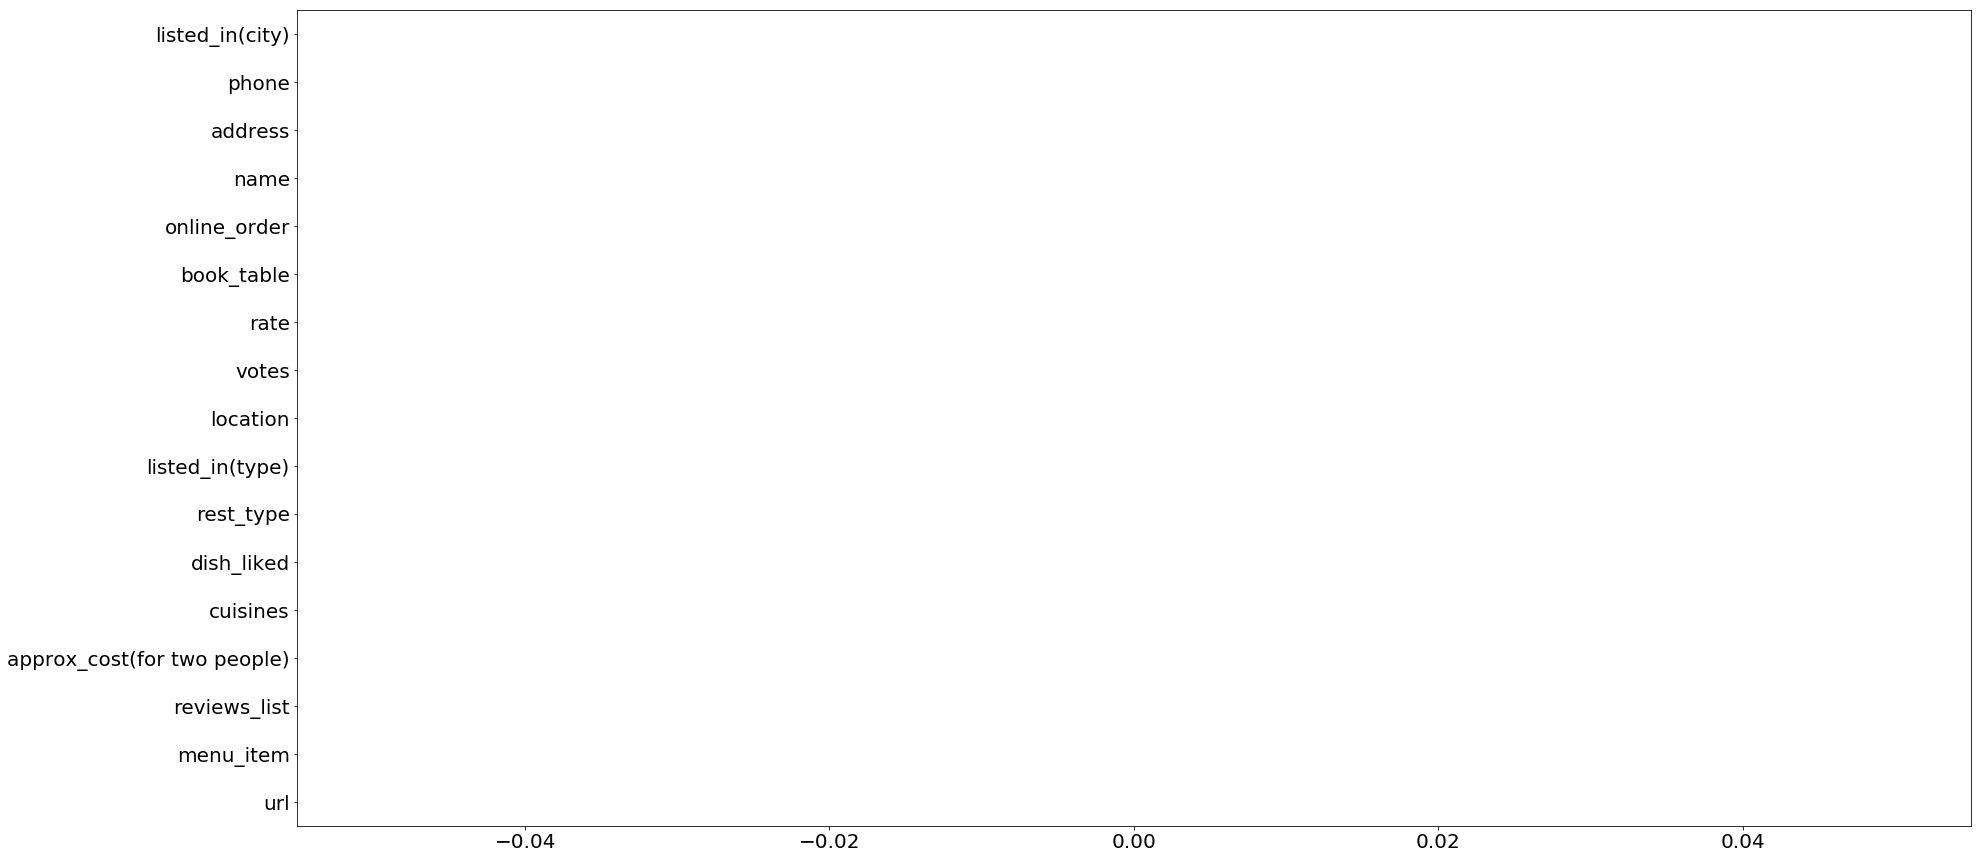

In [8]:
#Again taking a look at the dataset to check if any null values remain
fig = plt.figure(figsize=(30, 15))
df.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='Orange', fontsize=20)

In [9]:
#Removing the columns that would not effect the rating of the restaurant
del df['url']
del df['address']
del df['phone']
del df['location']

In [10]:
#Renaming some columns to understand the dataset easily
df.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
X = df
X.rate = X.rate.astype(str)
X.rate = X.rate.apply(lambda x: x.replace('/5',''))
X.rate = X.rate.apply(lambda x: float(x))
X.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Visualization

Are the location of restaurant loacalised to specific parts of city?


Text(0.5, 1.0, 'locality')

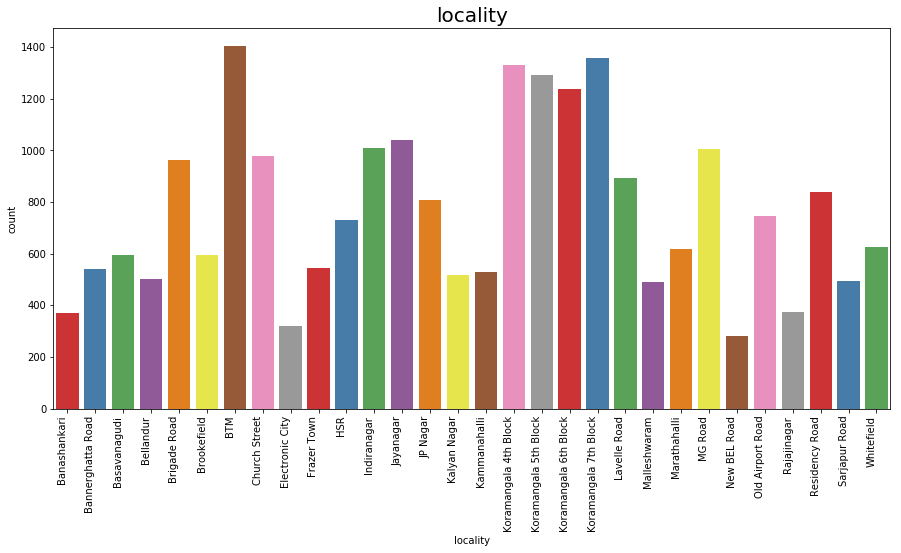

In [12]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x = 'locality', data = X, palette = 'Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('locality',size = 20)

Observation :- Most amount of restaurants are in BTM and Koramangala 4th, 5th and 7th blocks.

### Restaurant Type Distribution Plot

Text(0.5, 1.0, 'rest_type')

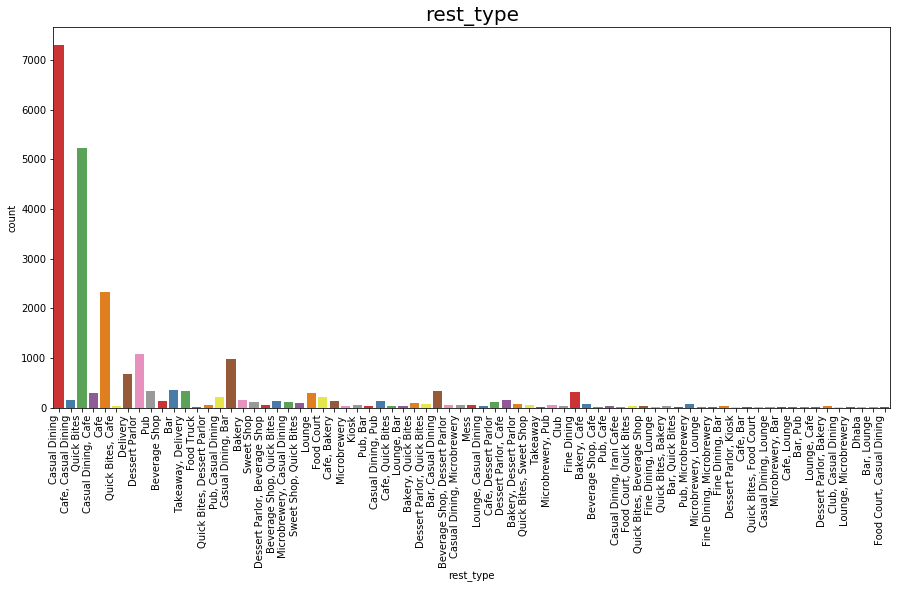

In [13]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="rest_type",data=X, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('rest_type',size = 20)

Observation:- As you can see most restaurants are of Casual Dining and Quick bites type.

#### Relation between online order and rating of the restaurant

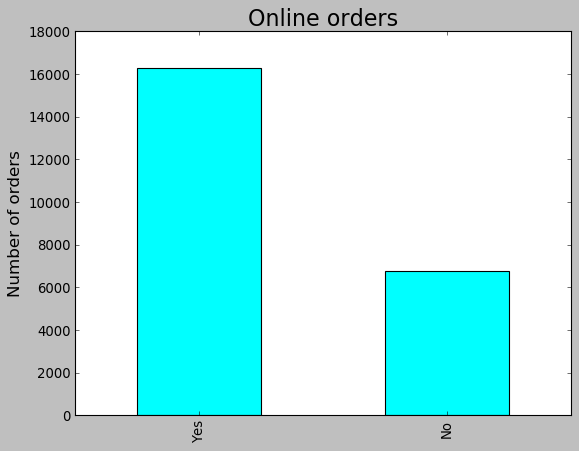

In [14]:
plt.rcParams['figure.figsize'] = (3, 4)
plt.style.use('_classic_test')

X['online_order'].value_counts().plot.bar(color = 'cyan')
plt.title('Online orders', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 15)
plt.show()

Observation :- We see that restaurants with online orders available has most order numbers overall.

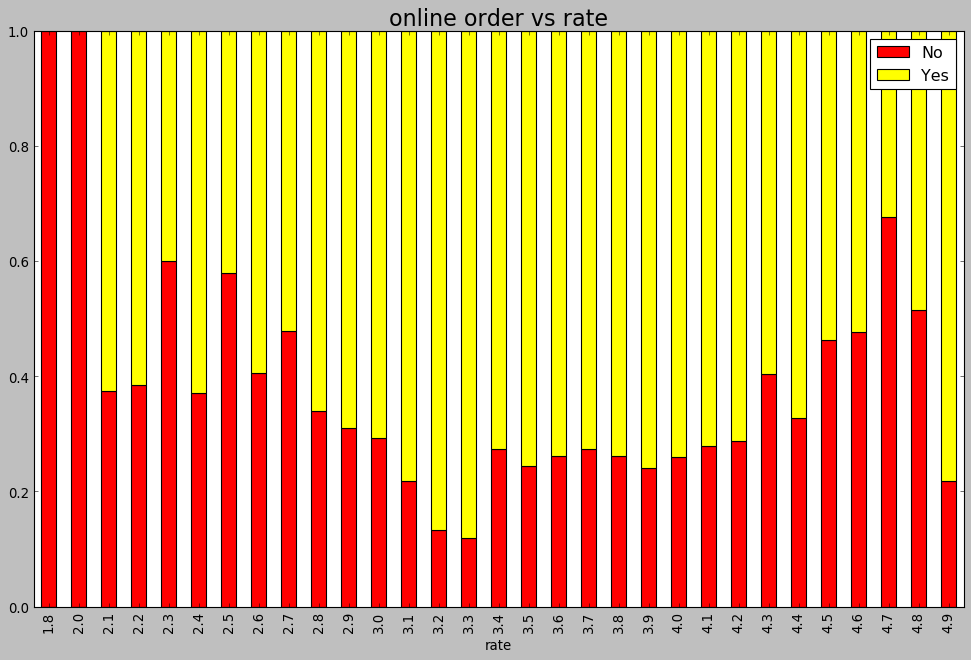

In [15]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(X['rate'], X['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('online order vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Observation:- Restaurants with online order option available has higher ratings.

#### Relation between Table booking option and rating of the restaurant

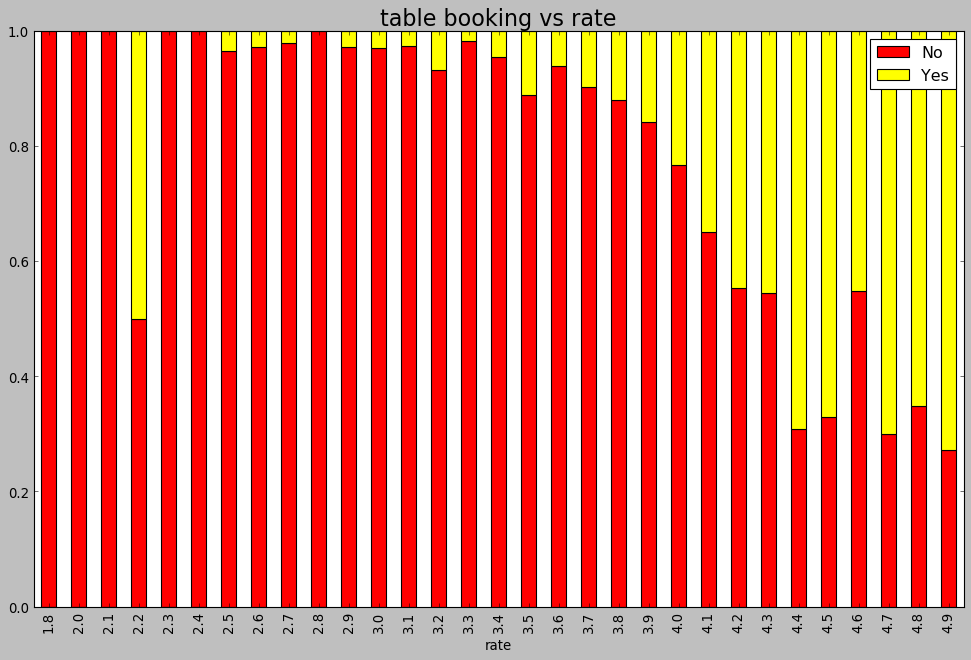

In [16]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(X['rate'], X['book_table'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Observation :- Restaurants with table booking option available are highly rated.

#### Cost Distribution of all restaurants in the city

Text(0.5, 1.0, 'Cost Distrubution for all restaurants')

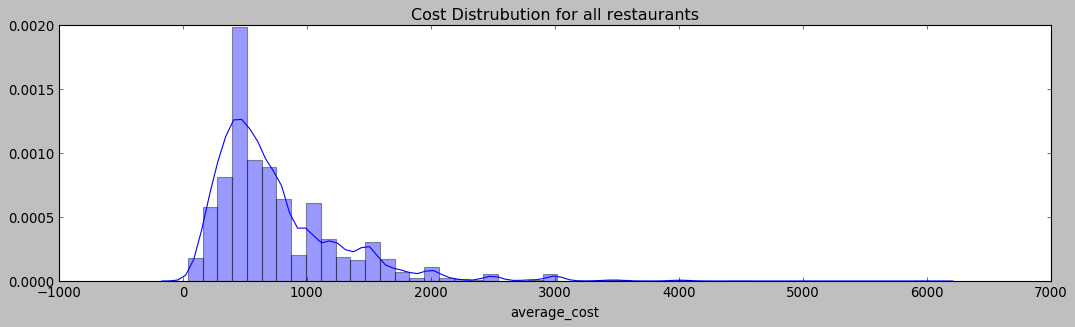

In [17]:
X.head()
X.average_cost = X.average_cost.apply(lambda x: x.replace(',',''))
X.average_cost = X.average_cost.astype(int)
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(X['average_cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants')

Observation :- We observe that most of the restaurants cost between Rs. 0-2000 on average.

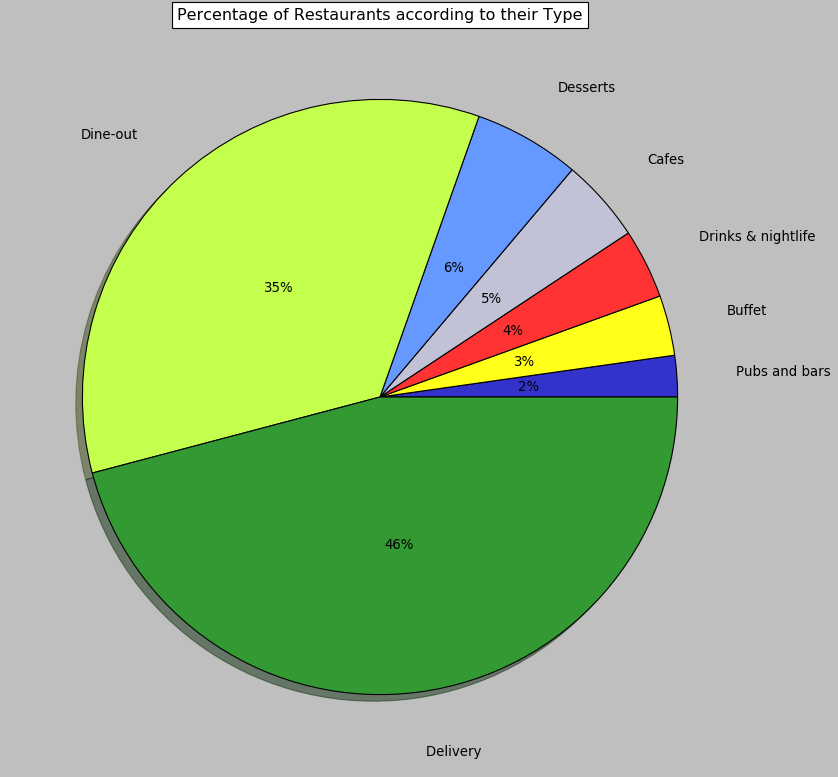

In [18]:
restaurantTypeCount=X['restaurant_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

Observation :- We see that most of the restaurants in the city are Delivery type followed by Dine-Out types.

### Finding the best restaurants

The criteria for best restaurants would be
cheapest,
highly rated,
reliable(large number of votes) options.

First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
Let me explain:- The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the restaurants that are 1/4th of 6000.


In [19]:
X= X.drop_duplicates(subset='name',keep='first')
# dups_name = X1.pivot_table(index=['name'],aggfunc='size')
newdf=X[['name','average_cost','locality','rest_type','cuisines']].groupby(['average_cost'], sort = True)
newdf=newdf.filter(lambda x: x.mean() <= 1500)
newdf=newdf.sort_values(by=['average_cost'])

newdf_expensive=X[['name','average_cost','locality','rest_type','cuisines']].groupby(['average_cost'], sort = True)
newdf_expensive=newdf_expensive.filter(lambda x: x.mean() >= 3000)
newdf_expensive=newdf_expensive.sort_values(by=['average_cost'])

Now lets find the highest rated restaurants i.e rating above 4.5 

In [20]:
newdf_rate=X[['name','rate']].groupby(['rate'], sort = True)
newdf_rate=newdf_rate.filter(lambda x: x.mean() >= 4.5)
newdf_rate=newdf_rate.sort_values(by=['rate'])
X.rate.value_counts()
X.rate.unique()
X.nunique()

name               3142
online_order          2
book_table            2
rate                 31
votes               965
rest_type            70
dish_liked         2903
cuisines           1475
average_cost         56
reviews_list       3107
menu_item           692
restaurant_type       7
locality             30
dtype: int64

Now, we'll merge both the dataframes obtained above to get the intersection of both i.e the highest rated and cheapest restaurants !!

In [21]:
s1 = pd.merge(newdf, newdf_rate, how='inner', on=['name'])

s2= pd.merge(newdf_expensive, newdf_rate, how='inner', on=['name'])

print("Cheap restaurants with low cost,high rating \n")
s1

Cheap restaurants with low cost,high rating 



,name,average_cost,locality,rest_type,cuisines,rate
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7
3,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5
4,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5
5,O.G. Variar & Sons,200,Malleshwaram,Bakery,"Bakery, Desserts",4.8
6,Mavalli Tiffin Room (MTR),250,Basavanagudi,Quick Bites,South Indian,4.5
7,Siddiqu Kabab Center,250,Brigade Road,Quick Bites,"North Indian, Rolls",4.5
8,Mugful Of Stories,300,Kalyan Nagar,Dessert Parlor,"Desserts, Bakery",4.6
9,The Pancake Story,300,BTM,Dessert Parlor,"Desserts, Beverages",4.6


In [22]:
print("Expensive restaurants with high cost,high rating \n")
s2

Expensive restaurants with high cost,high rating 



,name,average_cost,locality,rest_type,cuisines,rate
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5


### Find the most reliable restaurants

Voted more the mean number of votes:- 175

In [23]:
newdf_votes=X[['name','votes']].groupby(['votes'], sort = True)
newdf_votes=newdf_votes.filter(lambda x: x.mean() >= 175)
newdf_votes=newdf_votes.sort_values(by=['votes'])

#### These are the most reliable,  highest rated and economical restaurants.

We obtain this dataframe by simply taking the intersection of all the dataframes obtained above.

This dataframe obtained below shows the restaurants whose:

Cost is below 1500,
Rating is above 4.5,
Votes are above 175

In [24]:
s = pd.merge(s1, newdf_votes, how='inner', on=['name'])
s=s.sort_values(by=['average_cost'])
print("Cheap restaurants,high rating,high votes")
s

Cheap restaurants,high rating,high votes


,name,average_cost,locality,rest_type,cuisines,rate,votes
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8,2679
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7,651
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7,4408
3,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5,203
4,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5,2407
5,O.G. Variar & Sons,200,Malleshwaram,Bakery,"Bakery, Desserts",4.8,1156
6,Mavalli Tiffin Room (MTR),250,Basavanagudi,Quick Bites,South Indian,4.5,2896
7,Mugful Of Stories,300,Kalyan Nagar,Dessert Parlor,"Desserts, Bakery",4.6,274
8,HOMMS,300,Brookefield,Quick Bites,"Chinese, Beverages, Momos, Thai",4.5,224
13,Milano Ice Cream,400,Basavanagudi,Dessert Parlor,"Ice Cream, Desserts",4.5,197


### Best restaurant options under 500 Rupees (average cost):-

###### Brahmin's Coffee Bar with average cost=100 and rating=4.8 and votes=2679
###### CTR with average cost=150 and rating=4.7 and votes=4408
###### Veena Stores with average cost=150 and rating=4.5 and votes=2407
###### O.G. Variar & Sons with average cost=200 and rating=4.8 and votes=1156
###### Mavalli Tiffin Room (MTR) with average cost=250 and rating=4.5 and votes=2896
###### Belgian Waffle Factory with average cost=400 and rating=4.9 and votes=1746

### Other findings:- 

Also, observe that these cheaper options (cost<500) are all either Quick Bites, Cafe or Dessert Parlour.
Casual Dining restaurants start above 600
6 out of 10 of the cheapest restaurants serve South Indian Cuisine
As for the location, these cheap restaurant option are scattered and not localised to any specific location of the city.

## We can also explore the expensive options

In [25]:
s = pd.merge(s2, newdf_votes, how='inner', on=['name'])
s=s.sort_values(by=['average_cost'])
s

,name,average_cost,locality,rest_type,cuisines,rate,votes
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6,979
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5,674
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5,583


Observation :- No doubt JW Marriot is the most expensive restaurant.